In [1]:
import tensorflow.compat.v2 as tf
import PIL

In [2]:
single_image = tf.keras.preprocessing.image.load_img('J000047.88+141639.1.jpg')

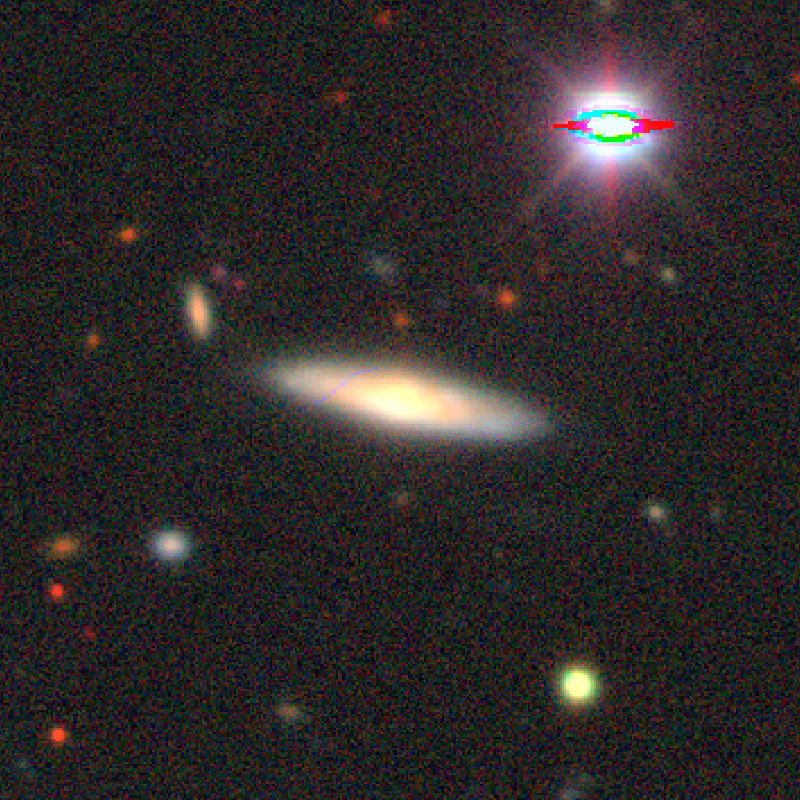

In [3]:
single_image

In [4]:
single_image = tf.keras.preprocessing.image.img_to_array(single_image)
single_image

array([[[56., 45., 62.],
        [24., 23., 31.],
        [10., 25., 28.],
        ...,
        [48., 15., 44.],
        [40., 27., 45.],
        [37., 40., 45.]],

       [[40., 41., 71.],
        [19., 27., 48.],
        [13., 33., 44.],
        ...,
        [51., 18., 37.],
        [42., 25., 35.],
        [42., 36., 36.]],

       [[18., 28., 63.],
        [ 0., 11., 43.],
        [ 0., 11., 37.],
        ...,
        [39., 22., 28.],
        [34., 24., 23.],
        [38., 34., 23.]],

       ...,

       [[34., 49., 52.],
        [16., 62., 59.],
        [ 4., 72., 61.],
        ...,
        [23., 45., 43.],
        [21., 42., 33.],
        [18., 32., 19.]],

       [[ 7., 18., 22.],
        [20., 40., 49.],
        [21., 38., 54.],
        ...,
        [18., 43., 37.],
        [25., 36., 32.],
        [43., 39., 40.]],

       [[11., 11., 19.],
        [43., 34., 55.],
        [53., 18., 58.],
        ...,
        [27., 48., 39.],
        [39., 39., 41.],
        [48., 30., 42.]]

In [5]:
single_image = tf.convert_to_tensor(single_image)
single_image

<tf.Tensor: shape=(800, 800, 3), dtype=float32, numpy=
array([[[56., 45., 62.],
        [24., 23., 31.],
        [10., 25., 28.],
        ...,
        [48., 15., 44.],
        [40., 27., 45.],
        [37., 40., 45.]],

       [[40., 41., 71.],
        [19., 27., 48.],
        [13., 33., 44.],
        ...,
        [51., 18., 37.],
        [42., 25., 35.],
        [42., 36., 36.]],

       [[18., 28., 63.],
        [ 0., 11., 43.],
        [ 0., 11., 37.],
        ...,
        [39., 22., 28.],
        [34., 24., 23.],
        [38., 34., 23.]],

       ...,

       [[34., 49., 52.],
        [16., 62., 59.],
        [ 4., 72., 61.],
        ...,
        [23., 45., 43.],
        [21., 42., 33.],
        [18., 32., 19.]],

       [[ 7., 18., 22.],
        [20., 40., 49.],
        [21., 38., 54.],
        ...,
        [18., 43., 37.],
        [25., 36., 32.],
        [43., 39., 40.]],

       [[11., 11., 19.],
        [43., 34., 55.],
        [53., 18., 58.],
        ...,
        [27., 48., 

In [6]:
croped = tf.image.central_crop(single_image, 0.5)
croped

<tf.Tensor: shape=(400, 400, 3), dtype=float32, numpy=
array([[[ 45.,  46.,  28.],
        [ 51.,  41.,  29.],
        [ 29.,   8.,  15.],
        ...,
        [100.,  59., 101.],
        [ 95.,  57.,  96.],
        [ 88.,  58.,  82.]],

       [[ 40.,  33.,  23.],
        [ 39.,  33.,  37.],
        [  9.,   4.,  27.],
        ...,
        [ 93.,  66., 107.],
        [ 86.,  58.,  96.],
        [ 83.,  57.,  86.]],

       [[ 51.,  36.,  33.],
        [ 37.,  35.,  46.],
        [  0.,  11.,  36.],
        ...,
        [ 95.,  64., 105.],
        [ 89.,  57.,  96.],
        [ 94.,  60.,  97.]],

       ...,

       [[ 17.,  32.,  13.],
        [ 13.,  38.,  16.],
        [  2.,  29.,  14.],
        ...,
        [ 20.,  50.,  52.],
        [ 27.,  57.,  49.],
        [ 25.,  60.,  40.]],

       [[ 22.,  28.,  14.],
        [ 20.,  37.,  18.],
        [  0.,  24.,  15.],
        ...,
        [ 22.,  41.,  56.],
        [ 38.,  50.,  50.],
        [ 36.,  53.,  37.]],

       [[ 30.,  3

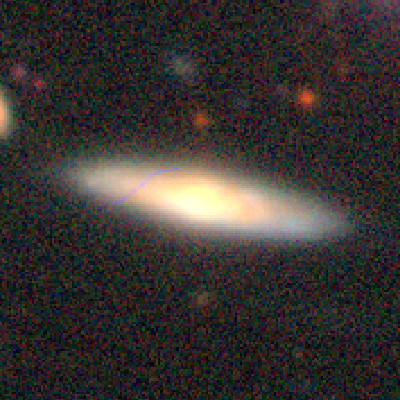

In [7]:
croped = croped.numpy()
croped = tf.keras.preprocessing.image.array_to_img(croped)
croped

In [8]:
# it works

In [9]:
#from the original script
def _compute_crop_shape(
    image_height, image_width, aspect_ratio, crop_proportion):
  """Compute aspect ratio-preserving shape for central crop.

  The resulting shape retains `crop_proportion` along one side and a proportion
  less than or equal to `crop_proportion` along the other side.

  Args:
    image_height: Height of image to be cropped.
    image_width: Width of image to be cropped.
    aspect_ratio: Desired aspect ratio (width / height) of output.
    crop_proportion: Proportion of image to retain along the less-cropped side.

  Returns:
    crop_height: Height of image after cropping.
    crop_width: Width of image after cropping.
  """
  image_width_float = tf.cast(image_width, tf.float32)
  image_height_float = tf.cast(image_height, tf.float32)

  def _requested_aspect_ratio_wider_than_image():
    crop_height = tf.cast(
        tf.math.rint(crop_proportion / aspect_ratio * image_width_float),
        tf.int32)
    crop_width = tf.cast(
        tf.math.rint(crop_proportion * image_width_float), tf.int32)
    return crop_height, crop_width

  def _image_wider_than_requested_aspect_ratio():
    crop_height = tf.cast(
        tf.math.rint(crop_proportion * image_height_float), tf.int32)
    crop_width = tf.cast(
        tf.math.rint(crop_proportion * aspect_ratio * image_height_float),
        tf.int32)
    return crop_height, crop_width

  return tf.cond(
      aspect_ratio > image_width_float / image_height_float,
      _requested_aspect_ratio_wider_than_image,
      _image_wider_than_requested_aspect_ratio)

In [10]:
#from the original script
image = tf.keras.preprocessing.image.load_img('J000047.88+141639.1.jpg')
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.convert_to_tensor(image)
shape = tf.shape(image)
image_height = shape[0]
image_width = shape[1]
crop_height, crop_width = _compute_crop_shape(image_height, image_width, 330 / 330, 0.5)
offset_height = ((image_height - crop_height) + 1) // 2
offset_width = ((image_width - crop_width) + 1) // 2
image = tf.image.crop_to_bounding_box(
      image, offset_height, offset_width, crop_height, crop_width)

image

<tf.Tensor: shape=(400, 400, 3), dtype=float32, numpy=
array([[[ 45.,  46.,  28.],
        [ 51.,  41.,  29.],
        [ 29.,   8.,  15.],
        ...,
        [100.,  59., 101.],
        [ 95.,  57.,  96.],
        [ 88.,  58.,  82.]],

       [[ 40.,  33.,  23.],
        [ 39.,  33.,  37.],
        [  9.,   4.,  27.],
        ...,
        [ 93.,  66., 107.],
        [ 86.,  58.,  96.],
        [ 83.,  57.,  86.]],

       [[ 51.,  36.,  33.],
        [ 37.,  35.,  46.],
        [  0.,  11.,  36.],
        ...,
        [ 95.,  64., 105.],
        [ 89.,  57.,  96.],
        [ 94.,  60.,  97.]],

       ...,

       [[ 17.,  32.,  13.],
        [ 13.,  38.,  16.],
        [  2.,  29.,  14.],
        ...,
        [ 20.,  50.,  52.],
        [ 27.,  57.,  49.],
        [ 25.,  60.,  40.]],

       [[ 22.,  28.,  14.],
        [ 20.,  37.,  18.],
        [  0.,  24.,  15.],
        ...,
        [ 22.,  41.,  56.],
        [ 38.,  50.,  50.],
        [ 36.,  53.,  37.]],

       [[ 30.,  3

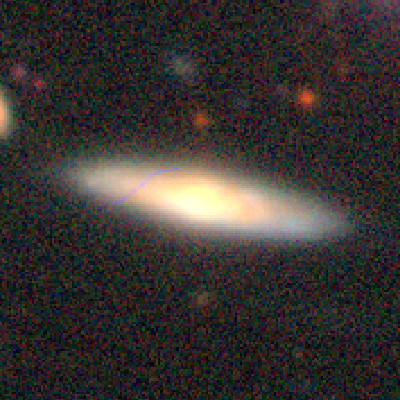

In [11]:
image = image.numpy()
image = tf.keras.preprocessing.image.array_to_img(image)
image

In [12]:
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.convert_to_tensor(image)
image = tf.image.random_crop(image, size=[400, 400, 3])

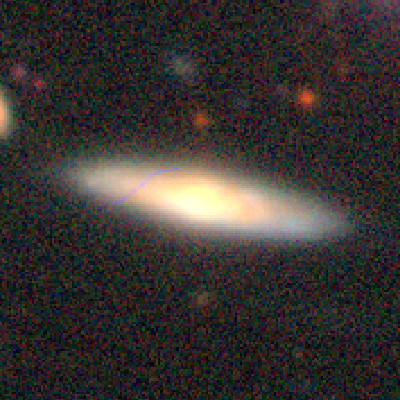

In [13]:
image = image.numpy()
image = tf.keras.preprocessing.image.array_to_img(image)
image